# matplotlib APIs and Integrations

## Table of Contents

* Introduction
  * A simple line
  * A deeper look
* Migrating from ``pylab`` to ``pyplot``
  * Gradient plot Example
    * MATLAB Gradient Plot
    * ``pylab`` Gradient Plot
  * The magnetic field of a long wire
    * MATLAB Magnetic Field
    * ``pylab`` Magnetic Field
  * Migrating to the ``pyplot`` API
    * The magnetic field of a long wire
* Using the ``pyplot`` API
    * The magnetic field due to two wires
    * The magnetic field surrounding a needle
    * Helmholtz coil, B magnitude cross section 
* Using the matplotlib OO API

## Introduction

In the following sections of this IPython Notebook we will investigate the different matplotlib APIs. These include:
 * ``pyplot`` and the scripting layer
 * matplotib artist and backend layers
 * the deprecated ``pylab`` procedural interface

Before we start, though, let's get things warmed up:

In [1]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

Here are the imports for the libraries we will be using:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends import backend_agg
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns
from IPython.display import Image 

Let's set up our colors for this notebook:

In [3]:
pallete_name = "husl"
colors = sns.color_palette(pallete_name, 8)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors) 

### A simple line

From the previous notebook, we had an example like this:

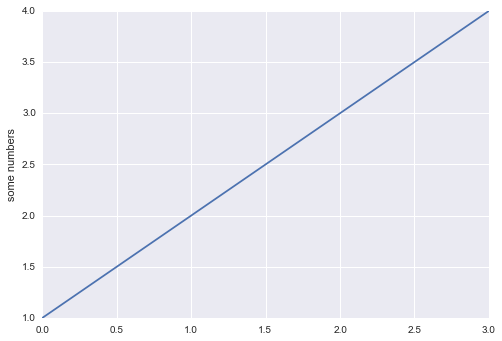

In [4]:
data = [1,2,3,4]
plt.plot(data)
plt.ylabel('some numbers')
plt.show()

This demonstrates one of the simplest examples of ``pyplot`` usage, and it was useful for our purpose of examining the architecture and import relationships of matplotlib. Now, however, we want to examine the matplotlib APIs, and will be using more complicated examples to do this.

### A deeper look

In general, the various matplotlib APIs are well-covered by other resources, both books and open source documentation. As such, we're going to provide a summary of the matplotlib APIs with an eye towards three things:
* showing the connection of APIs to the libraries conceptual architecture as covered in the previous notebook
* providing a sense of continuity from the linage inspired by MATLAB
* establishing some guidelines for selecting between the scripting layer and interfacing directly with the artist and backend layers, and finally
* doing these with plots that are more interesting than your typical, run-of-the-mill examples ;-)

## Migrating from ``pylab`` to ``pyplot``

Our first example will focus on the problem of plotting a simple magnetic field. We'll take a quick look at the following:
 * a quick comparison between MATLAB and ``pylab`` vector fields
 * prepare for a more detailed examination with the equations governing the related physics
 * a MATLAB excerpt for this problem
 * another quick comparison with ``pylab``
 * a detailed solution in ``pylab``
 * a conversion of the ``pylab`` solution to a ``pyplot`` solution

### Gradient plot Example

In our first comparison between MATLAB and ``pylab``, we will look at plotting vector fields using the following equation as the basis for comparison:

\begin{align} 
z = xe^{-x^2 - y^2}
\end{align}


#### MATLAB Gradient Plot

Here is the MATLAB code that plots that vector field equation:

```MATLAB
[X,Y] = meshgrid(-2:.2:2);
Z = X.*exp(-X.^2 - Y.^2);
[DX,DY] = gradient(Z,.2,.2);

figure
contour(X,Y,Z)
hold on
quiver(X,Y,DX,DY)
hold off
```

The following image is the output:

<img style="float:left" src="./MATLAB-QuiverPlotExample.png" />
<br style="clear:both"/>

#### ``pylab`` Gradient Plot

In ``pylab``, we can accomplish the same thing with the following:

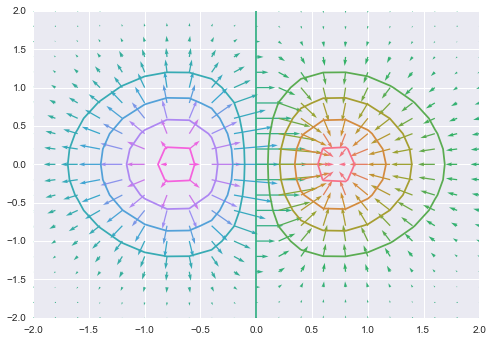

In [5]:
from matplotlib.pylab import *

(y, x) = mgrid[-2:2.1:0.2,-2:2.1:0.2]
z = x * exp(-x ** 2 - y ** 2)
(dy, dx) = gradient(z)

quiver(x, y, dx, dy, z, cmap=cmap)
hold(True)
contour(x, y, z, 10, cmap=cmap)
show()

### The magnetic field of a long wire

Note: the following example has been adopted from a matplotlib [vector plots tutorial](http://bulldog2.redlands.edu/facultyfolder/deweerd/tutorials/Tutorial-QuiverPlot.pdf) by [Professor Alan J. DeWeerd](http://bulldog2.redlands.edu/facultyfolder/deweerd/).


A common task in computational physics texts is to plot a cross-section the magnetic field of a wire along its $z$ axis. The natural coordinate system for such an example is cylindrical, and the equation for such a magnetic field is

\begin{align}
\vec{\mathbf{B}} = \frac{\mu_0 I}{2 \pi s} \hat{\theta}
\end{align}

where $\mu_0$ is the [magnetic constant](http://en.wikipedia.org/wiki/Vacuum_permeability) (the permeability of free space), $I$ is current and $s$ is the distance from wire. $\hat{\theta}$ simply indicates that this is a vector in a cylindrical coordinate system.

The following can be used to convert this to a Cartesian coordinate system:

\begin{align} 
\vec{\mathbf{B}} = \frac{\mu_0 I}{2 \pi s} \left( - \sin \theta \hat{x} + \cos \theta \hat{y} \right) = \left( \frac{\mu_0 I}{2 \pi} \right) \frac{1}{s} \left( - \frac{y}{s} \hat{x} + \frac{x}{s}  \hat{y} \right) = \left( \frac{\mu_0 I}{2 \pi} \right) \left( - \frac{y}{s^2} \hat{x} + \frac{x}{s^2}  \hat{y} \right)
\end{align}

where $s^2 = x^2 + y^2$, the square of the distance from the wire to the point $(x, y)$.

Note that due to the following:

\begin{align} 
\frac{\mu_0}{2 \pi} = \frac{4{\pi}{\times}10^{-7}}{2 \pi} \frac{V·s}{A·m} = 2{\times}10^{-7} \frac{V·s}{A·m}
\end{align}

we will define a constant $\mu = 2{\times}10^{-7} \frac{V·s}{A·m}$, giving our magnetic equation in Cartesian coordinates the following form:

\begin{align} 
\vec{\mathbf{B}} =  {\mu}I \left( - \frac{y}{s^2} \hat{x} + \frac{x}{s^2}  \hat{y} \right)
\end{align}

With the equations in hand, we're ready to see the physics in action!

#### MATLAB Magnetic Field

Users of MATLAB might solve this in the manner as done by [Sathyanarayan Rao](http://www.mathworks.com/matlabcentral/fileexchange/authors/154405) in the [code](http://www.mathworks.com/matlabcentral/fileexchange/47368-3d-magnetic-field-computation-of-a-straight-wire-of-finite-length-using-biot-savart-s-law/content/straight_wire.m) that he shared on the [MATLAB Central site](http://www.mathworks.com/matlabcentral). Here is an edited excerpt:

```MATLAB
quiver(Y((Nx-1)/2,:,:),Z((Nx-1)/2,:,:),BY((Nx-1)/2,:,:),BZ((Nx-1)/2,:,:),2);
hold on
G1=plot(0,0,'.','markersize',6);
axis([ -5 5 -5 5])
Xlabel('Y-axis','fontsize',14)
Ylabel('Z-axis','fontsize',14)
title('B-field YZ plane','fontsize',14)
```

The plot code that this was taken from renders as the following in MATLAB:

<img style="float:left" src="./MATLAB-B-field.jpg" width="500" />
<br style="clear:both"/>

#### ``pylab`` Magnetic Field

Converting from MATLAB to matplotlib is made almost trivial via the (deprecated) ``pylab`` API. Here's what that code sample above would look like using ``pylab``:

```python
quiver(x_values, y_values, vector_x_comp, vector_y_comp)
hold()
axis(x_min, x_max, y_min, y_max)
xlabel('X-axis', fontsize=14)
ylabel('Y-axis', fontsize=14)
title('B-field YZ plane', fontsize=14)

```

Let's use a slightly modified version of Professor DeWeerd's tutorial as the basis for examining a full ``pylab`` example, starting with the necessary import and definition of initial values:

In [6]:
from matplotlib.pylab import *

m = 2.0e-7
I = 50
(xmin, xmax, _) = xrange = (-2.0, 2.0, 10)
(ymin, ymax, _) = yrange = (-2.0, 2.0, 10)
ranges = [xmin, xmax, ymin, ymax]

We're not going to use the step values individually, so we assign them to the "ignore" variable.

Next, make the grid and calculate the $x$ and $y$ vector components:

In [7]:
xs = linspace(*xrange)
ys = linspace(*yrange)
x, y = meshgrid(xs, ys)
s2 = (x ** 2) + (y ** 2)

Now that we have the the $x$ and $y$ components for our given range as well as the distance $s$, we can obtain the vector components of the magnetic field:

In [8]:
Bx = m * I * (- y / s2)
By = m * I * (x / s2)
B = Bx + By

Next we will plot our magnetic field, using the color map we defined at the beginning of this notebook:

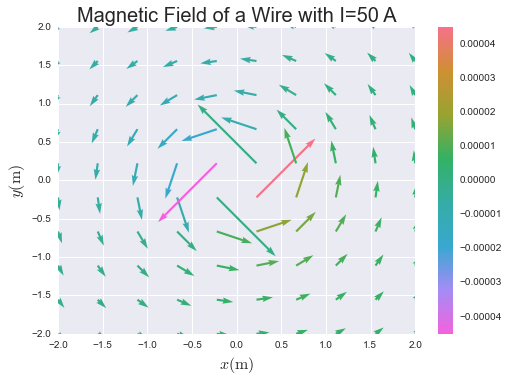

In [9]:
quiver(x, y, Bx, By, B, units='xy', cmap=cmap)
axis(ranges, aspect=1)
title('Magnetic Field of a Wire with I=50 A', fontsize=20)
xlabel('$x \mathrm{(m)}$', fontsize=16)
ylabel('$y \mathrm{(m)}$', fontsize=16)
colorbar(orientation='vertical')
show()

### Migrating to the ``pyplot`` API

#### The magnetic field of a long wire

Now we'll see how to convert from ``pylab`` to ``pyplot``. The only "trick" with this is figuring out where the functions you want *actually* live.

We're going to use slightly different values for this example, just to mix things up a bit, so let's redefine some variables:

In [10]:
m = 2.0e-7
I = 50
(xmin, xmax, _) = xrange = (-2.0, 2.0, 30)
(ymin, ymax, _) = yrange = (-2.0, 2.0, 30)
ranges = [xmin, xmax, ymin, ymax]

Now let's calculate the $x$ and $y$ vector components:

In [11]:
x, y = np.meshgrid(
    np.linspace(*xrange),
    np.linspace(*yrange))
s2 = (x ** 2) + (y ** 2)

As you can see, we identified the ``linspace`` and ``meshgrid`` functions as being part of NumPy. How does one know where to look?

If you open up the ``pylab.py`` file from a ``git clone`` of matplotlib, or if you look at the files [online](https://github.com/matplotlib/matplotlib/blob/3a828ddb7df3bc597254f875cbbac6aadf48aee0/lib/matplotlib/pylab.py), you will see that this module consists entirely of docstrings and imports, no actual function definitions. Most of the code comes from the following sources:
 * ``matplotlib.mlab``
 * ``matplotlib.pyplot``
 * ``matplotlib.cbook`` ("cookook" -- a utility function module)
 * ``numpy``, and
 * various ``numpy.*`` modules

Some good rules of thumb for figuring out where to look in the matplotlib or NumPy code bases, are the following:
 * If the function call has to deal directly with plotting, axes, figures, projections and other transformations, or other visual elements of the plot, look to matplotlib.
 * Likewise if the function is concerned with saving images, configuring formats, selecting colors, etc.
 * If the function is concerned with data, data types, mathematical operations, or transformations of *data*, look to NumPy.

To give you a better sense of that last item, some of the other NumPy functions imported by ``pylab`` are from the following:
 * the fast Fourier transform module
 * the linear algebra module
 * the masked array module
 
Other matplotlib libraries imported include the ``dates`` and ``finance`` modules.

Let's continue with the example. The following is the same as in the ``pylab`` example, since it's just assigning data, not making API calls:

In [12]:
Bx = m * I * (- y / s2)
By = m * I * (x / s2)
B = Bx + By

Next we will plot our magnetic field. As you can see, all of these functions are module-level functions defined in ``pyplot`` (which we have aliased to ``plt``, per the community recommendations).

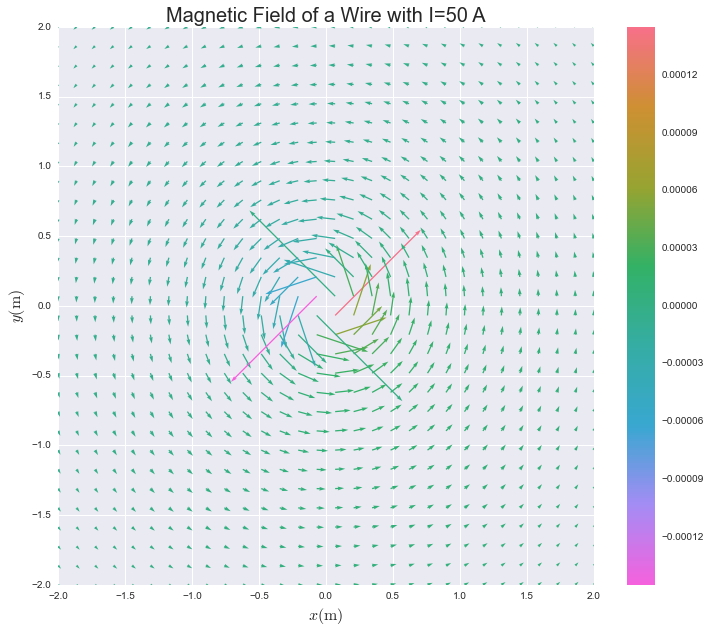

In [13]:
plt.figure(figsize=(12,10))
plt.quiver(x, y, Bx, By, B, cmap=cmap)
plt.axis(ranges, aspect=1)
plt.title('Magnetic Field of a Wire with I=50 A', fontsize=20)
plt.xlabel('$x \mathrm{(m)}$', fontsize=16)
plt.ylabel('$y \mathrm{(m)}$', fontsize=16)
plt.colorbar(orientation='vertical')
plt.show()

Let's get another view of this data zoomed in to a 1x1 box around the origin, using a different type of plot:

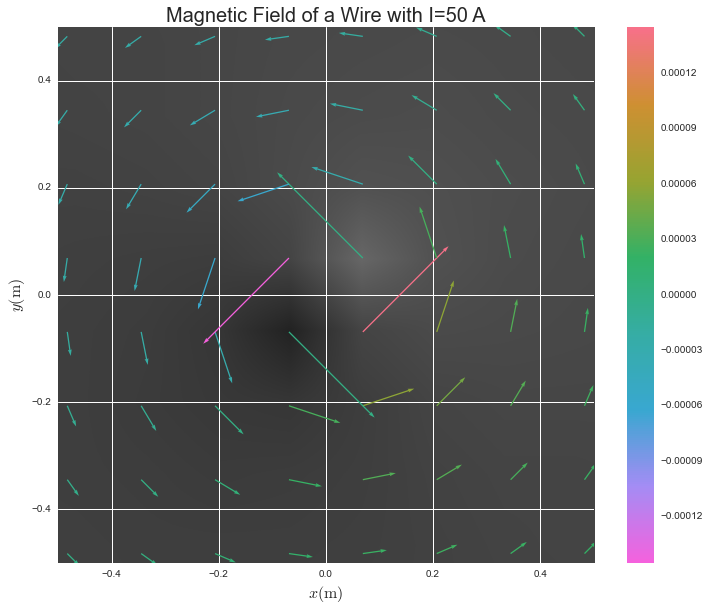

In [14]:
figure, axes = plt.subplots(figsize=(12,10))
im = axes.imshow(B, extent=ranges,
                 cmap=sns.dark_palette("#666666", as_cmap=True))
q = axes.quiver(x, y, Bx, By, B, cmap=cmap)
figure.colorbar(q, shrink=0.96)
plt.axis([-0.5, 0.5, -0.5, 0.5], aspect=1)
plt.title('Magnetic Field of a Wire with I=50 A', fontsize=20)
plt.xlabel('$x \mathrm{(m)}$', fontsize=16)
plt.ylabel('$y \mathrm{(m)}$', fontsize=16)
plt.show()

In [15]:
(xmin, xmax, _) = xrange = (-0.75, 0.75, 40)
(ymin, ymax, _) = yrange = (-2.0, 2.0, 40)
ranges = [xmin, xmax, ymin, ymax]

In [16]:
x, y = np.meshgrid(
    np.linspace(*xrange),
    np.linspace(*yrange))
s2 = (x ** 2) + (y ** 2)

In [17]:
Bx = m * I * (- y / s2)
By = m * I * (x / s2)
B = Bx + By

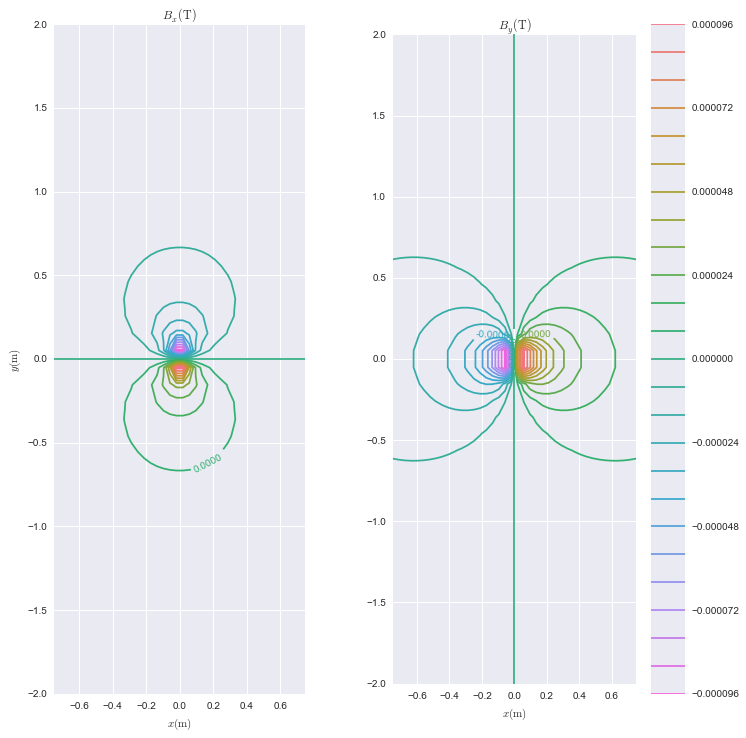

In [18]:
B_plot = plt.figure(figsize=(12,12))
B_plot.add_subplot(121)
Bx_plot = plt.contour(x, y, Bx, 30, cmap=cmap)
Bx_plot.ax.set(aspect=1)
plt.clabel(Bx_plot, Bx_plot.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
plt.title('$B_x \mathrm{(T)}$')
plt.xlabel('$x \mathrm{(m)}$')
plt.ylabel('$y \mathrm{(m)}$')
B_plot.add_subplot(122)
By_plot = plt.contour(x, y, By, 30, cmap=cmap)
By_plot.ax.set(aspect=1)
plt.clabel(By_plot, By_plot.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
plt.title('$B_y \mathrm{(T)}$')
plt.xlabel('$x \mathrm{(m)}$')
plt.colorbar(orientation='vertical')
plt.show()

## Using the ``pyplot`` API

### The magnetic field due to two wires

Professor DeWeerd was kind enough to provide us with another problem he gives to his students, when we contacted him for permission to use the tutorial code. What happens when you have 2 wires? If the vector equation for one wire is

\begin{align} 
\vec{\mathbf{B_1}} = {\mu}I_1 \left( - \frac{y_1}{s_1^2} \hat{x} + \frac{x_1}{s_1^2}  \hat{y} \right)
\end{align}

then for two wires, it will just be vector addition:

\begin{align} 
\vec{\mathbf{B}} = {\mu}I_1 \left( - \frac{y_1}{s_1^2} \hat{x} + \frac{x_1}{s_1^2}  \hat{y} \right)
                  +{\mu}I_2 \left( - \frac{y_2}{s_2^2} \hat{x} + \frac{x_2}{s_2^2}  \hat{y} \right)
\end{align}

In our case, the $y$ values and current are the same in each wire, so this simplifies matters:

\begin{align} 
\vec{\mathbf{B}} = {\mu}I \left( - \frac{y}{s_1^2} \hat{x} + \frac{x_1}{s_1^2}  \hat{y} \right)
                  +{\mu}I \left( - \frac{y}{s_2^2} \hat{x} + \frac{x_2}{s_2^2}  \hat{y} \right)
\end{align}
\begin{align} 
= {\mu}I \left( - \frac{y}{s_1^2} \hat{x} + \frac{x_1}{s_1^2}  \hat{y}
                - \frac{y}{s_2^2} \hat{x} + \frac{x_2}{s_2^2}  \hat{y} \right)
\end{align}

\begin{align} 
= {\mu}I \Bigg( - \bigg( \frac{y}{s_1^2} \hat{x} + \frac{y}{s_2^2} \hat{x} \bigg)
                + \bigg( \frac{x_1}{s_1^2}  \hat{y} + \frac{x_2}{s_2^2}  \hat{y} \bigg) \Bigg)
\end{align}

\begin{align} 
= {\mu}I \Bigg( - \bigg( \frac{y}{s_1^2} + \frac{y}{s_2^2} \bigg) \hat{x}
                + \bigg( \frac{x_1}{s_1^2} + \frac{x_2}{s_2^2} \bigg) \hat{y} \Bigg)
\end{align}


Which gives us the following:

\begin{align} 
\vec{\mathbf{B}} = {\mu}I \Bigg( - \bigg( \frac{y}{s_1^2} + \frac{y}{s_2^2} \bigg) \hat{x}
                 + \bigg( \frac{x - d}{s_1^2} + \frac{x + d}{s_2^2} \bigg) \hat{y} \Bigg)
\end{align}

If you are curious, the work for this was checked using the [sympy](http://sympy.org/en/index.html) symbolic mathematics library. You can view the work [here](./sympy-factoring-bfield.ipynb).

The resultant equation above is used for the following calculations.

In [19]:
d = 0.04
m = 2.0e-7
I = 1
(xmin, xmax, _) = xrange = (-0.06, 0.06, 12)
(ymin, ymax, _) = yrange = (-0.06, 0.06, 12)
ranges = [xmin, xmax, ymin, ymax]

x, y = np.meshgrid(
    np.linspace(*xrange),
    np.linspace(*yrange))

x1 = x - d
x2 = x + d
s12 = (x1 ** 2) + (y ** 2)
s22 = (x2 ** 2) + (y ** 2)
Bx = m * I * (- y / s12 + y / s22)
By = m * I * (x1 / s12 - x2 / s22)
B = Bx + By

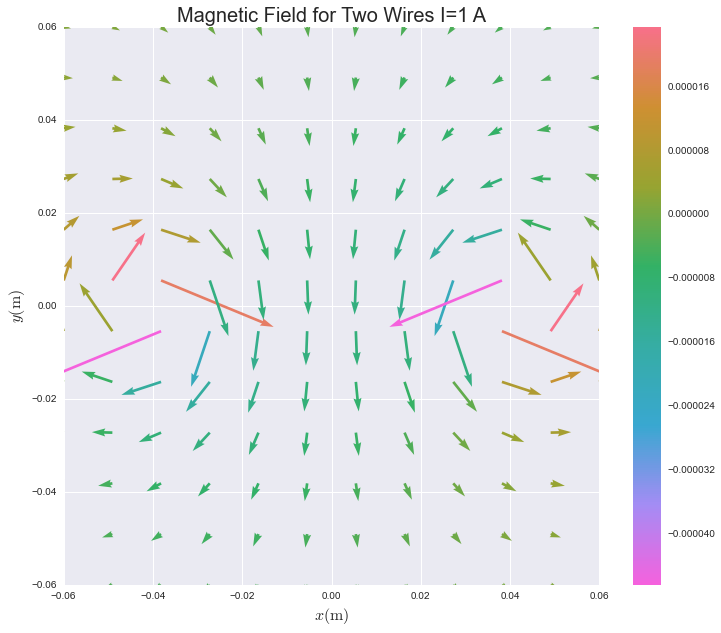

In [20]:
plt.figure(figsize=(12,10))
q = plt.quiver(x, y, Bx, By, B, cmap=cmap)
plt.axis(ranges, aspect=1)
plt.title('Magnetic Field for Two Wires I=1 A', fontsize=20)
plt.xlabel('$x \mathrm{(m)}$', fontsize=16)
plt.ylabel('$y \mathrm{(m)}$', fontsize=16)
plt.colorbar(orientation='vertical')
plt.show()

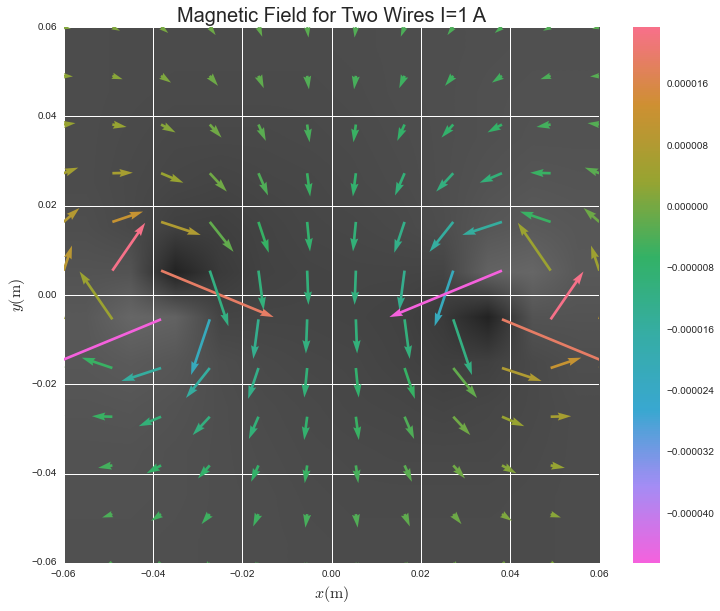

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(B, extent=ranges, 
               cmap=sns.dark_palette("#666666", as_cmap=True))
q = ax.quiver(x, y, Bx, By, B, cmap=cmap)
fig.colorbar(q, shrink=0.96)
plt.axis(ranges, aspect=1)
plt.title('Magnetic Field for Two Wires I=1 A', fontsize=20)
plt.xlabel('$x \mathrm{(m)}$', fontsize=16)
plt.ylabel('$y \mathrm{(m)}$', fontsize=16)
plt.show()

### The magnetic field surrounding a needle

Note: The following example was adapted from the work of [Jonathan W. Keohane](http://www.hsc.edu/Academics/Academic-Majors/Physics-and-Astronomy/Professors/Jonathan-Keohane.html) in his plotting examples given on the National Radio Astronomy Observatory's [Common Astronomy Software Applications](http://casaguides.nrao.edu/index.php?title=PlotBasics) user guide/wiki. (Original code for this example is [here](http://casaguides.nrao.edu/images/0/0a/Magnetic_Needle_Example.py).)

First, let's define some variables:

In [22]:
N = 20      # Size of NxN array.
R = 0.25    # Size of the two circular masks.
l = 1.0     # Length of the rod.
l2 = l/2.0  # Saves on typing l/2.0 all the time.

In [23]:
# Define s and z
s_delt = 1.0/(N/2)
s_max =  1*(1.0 + 0.5*s_delt)
s_min =  -1*(1.0 - 0.5*s_delt)
# Square Axes
z_delt = 1.0/(N/2)
z_min = -1*(1.0 - 0.5*z_delt)
z_max =  1*(1.0 + 0.5*z_delt)

In [24]:
s_space_1D = np.arange(s_min, s_max, s_delt)
z_space_1D = np.arange(z_min, z_max, z_delt)

In [25]:
s, z = np.meshgrid(s_space_1D, z_space_1D)

In [26]:
Bs = 1.0/np.sqrt(s**2 + (z - l2)**2) - 1.0/np.sqrt(s**2 + (z + l2)**2)
Bs = Bs + (z + l2)**2 / (s**2 + (z + l2)**2)**1.5 - (z - l2)**2 / (s**2 + (z - l2)**2)**1.5
Bs = (1.0/(l*s))*Bs
Bz = (z + l2) / (s**2 + (z + l2)**2)**1.5 - (z - l2) / (s**2 + (z - l2)**2)**1.5
Bz = (-1.0/l)*Bz

In [27]:
mask = np.logical_or(np.sqrt(s**2 + (z-l2)**2) < R,np.sqrt(s**2 + (z+l2)**2) < R)
Bs = np.ma.masked_array(Bs, mask)
Bz = np.ma.masked_array(Bz, mask)
B = Bs + Bz

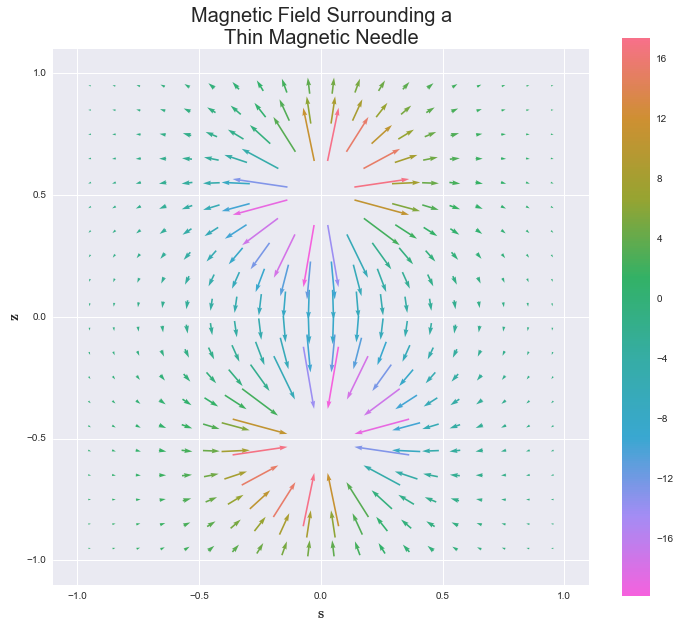

In [28]:
plt.figure(figsize=(12, 10))
plt.box(on='on')
plt.axis('scaled')
plt.axis((-1.1, 1.1, -1.1, 1.1))
plt.quiver(s, z, Bs, Bz, B, pivot='middle', cmap=cmap)
plt.title('Magnetic Field Surrounding a\nThin Magnetic Needle', fontsize=20)
plt.xlabel(r'$\bf s$', fontsize=16)
plt.ylabel(r'$\bf z$', fontsize=16)
plt.colorbar(orientation='vertical')
plt.show()

### Helmholtz coil, B magnitude cross section 

Note that the following code was modified from [this example](http://www.physics.utoronto.ca/~phy326/python/helmholtz.py) by Byron Wilson and David Bailey.

All parameters are floats in SI units, i.e. meter, Ampere, Tesla. The $x$-axis is defined by the axis of coils' midpoint on the $x$-axis between coils defined origin of $(x,y)=(0,0)$.

Input the desired specifications of the Helmholtz coil. Be sure to use floats in SI units.

In [29]:
# a : coil width (in x)
a = 0.02
# b : coil thickness (in y)
b = 0.02
# ro : The difference between R and the radius of the first coil.
#       (This allows the possibility of the two coils haveing slightly
#       different radii.)
ro = 0.0015
# tao : same thing as ro but for the second coil
tao = 0.0015
# N : number of wire turns in one coil.
N = 152.0
# I : current in wire
I = 0.251
# R  : distance between the centres of the coils
R = 0.6
# M : permeability constant ("mu nought") of air
M = 4.0 * np.pi * 0.0000001

Now let's define some functions:

In [30]:
def get_bx(x,y,a,b,ro,tao,N,I,R,M):
    """Returns the x component of the magnetic field at the point x,y,
    (formula 4a of Crosser et al.)
    
    These are the formula in the article written out term by term and then
    summed together and multiplied together in the last two lines."""
    t1 = (b**2 / (60.0 * R**2))
    t2 = fcx
    t3 = (x * f1x)/(125.0*R)
    t4 = (f2x * (2 * x**2 - y**2)) / (125.0 * R**2)
    t5 = (f3x*(3.0 * x * y**2 - 2.0 * x**3))/(125.0 * R**3)
    t6 = (18.0*(8.0 * x**4 - 24 * x**2 * y**2 + 3 * y ** 4))/(125.0 * R**4)
    p2 = 1 - t1 + t2 + t3 + t4 + t5 - t6
    return ( (8.0 * M * N * I) / (R * 5 * np.sqrt(5)) * p2)

def get_by(x,y,a,b,ro,tao,N,I,R,M):
    """Returns the y component of the magnetic field at the point x,y,
    (formula 4b of Crosser et al.)"""
    return ( (8.0 * M * N * I) / (R * 5 * np.sqrt(5))
            * ( (y * f1y) / (125.0 * R) + (x * y * f2y)/(125.0 * R**2)
            + (y * f3y * (4.0 * x**2 - y**2))/(125.0 * R**3)
            + (x * y * (288.0 * x**2 - 216.0 * y**2))/(125.0 * R**4)))

#: term f1x (formula 4c of Crosser et al.)
fcx = ( -(18.0 * a**4 + 13 * b**4)/(1250.0 * R**4)
    + (31.0 * a**2 * b**2)/ (750.0 * R**4)
    + ((tao + ro) / R)*(1.0/5 + (2.0 * (a**2 - b**2))/ (250 * R**2))
    - ((tao**2 + ro**2)/(250 * R**2))*(25.0 + (52 * b**2 - 62 * a**2) / R**2) 
    - (8.0 * (tao**3+ro**3)/ (25.0 * R**3))
    - (52.0 * (tao**4 + ro**4)) / (125.0 * R**4) )

#: term f1x (formula 4d of Crosser et al.)
f1x = ( ((tao - ro)/R) * (150.0 + (24.0 * b**2 - 44.0 * a**2) / R**2 )
    + (165.0 * (tao**2 - ro**2)) / R**2
    + 96 * (tao**3 - ro**3) / R**3 )

#: term f2x (formula 4e of Crosser et al.)
f2x = ( (31 * b**2 - 36 * a**2) / R**2
        + (60 * (tao + ro)) / R
        + (186 * (tao**2 + ro**2)) / R**2 )

#: term f3x (formula 4f of Crosser et al.)
f3x = (88.0 * (tao - ro)) / R

#: term f1y (formula 4g of Crosser et al.)
f1y = ( ((ro - tao) / R) * (75.0 + (12.0 * b**2 - 22.0 * a**2)/ R**2)
        + (165 * (ro**2 - tao**2)) / (2 * R**2)
        + (48 * (ro **3 - tao **3)) / R**3 )

#: term f2y (formula 4h of Crosser et al.)
f2y = ( (72 * a**2 - 62 * b **2) / R**2
        + (120 * (tao + ro))/ R
        + (372 * (tao**2 + ro**2)) / R**2 )

#: term f3y (formula 4h of Crosser et al.)
f3y = (66 * (tao - ro))/R

def get_uniformity(r,a,b,ro,tao,N,I,R,M):
    """Given the desired radius of the cylindar of uniformity r (a float), and
    floats corresponding to the coil a,b,ro,tao,N,I,R,M (defined in the body
    of the program). return the height of the cylindar of uniformity."""
    #find the magnetic field at the origin and initialize the x variable that
    #will be increased through iterations of the while loop
    x_origin = get_bx(0,0,a,b,ro,tao,N,I,R,M)
    y_origin = 0.0
    x = 0.0
    
    while 1 == 1:
        #set a proxy value for the radius, j and if the magnitude of the
        #magnetic field is within 0.1% of the original magnetic field for each
        #iteration and increase of the radius value j.
        j = 0.0
        
        while j < r:
            if abs( np.sqrt(get_bx(x,j,a,b,ro,tao,N,I,R,M)**2 + 
                    get_by(x,j,a,b,ro,tao,N,I,R,M)**2) - x_origin) > \
                        abs(x_origin * 0.001):
                return x
            j += 0.001
            
        x += 0.001

Basically there are two useful operations: you can calculate the magnetic field at a given point with the two functions ``get_bx`` and ``get_by``. For example: you can do this to print the desired field at the given $x$ and $y$ $(i, j)$ cordinates.

In [31]:
x = 0.0
y = 0.0
print("the magnetic field at %s is %s" % ((x,y),(
            get_bx(x,y,a,b,ro,tao,N,I,R,M),get_by(x,y,a,b,ro,tao,N,I,R,M))))

the magnetic field at (0.0, 0.0) is (5.7231668715894949e-05, 0.0)


Another operation you can perform with this program is find regions that have a uniform magnetic field produced by the helmholtz coils. One function gives the height of a uniform-magnetic-field cylindar of given radius $r$. For example:

In [32]:
radius = 0.09

print("the height of a uniform magnetic field cylindar of radius\
    %s (m) is %s (m)" % (radius,get_uniformity(radius,a,b,ro,tao,N,I,R,M)))

the height of a uniform magnetic field cylindar of radius    0.09 (m) is 0.09200000000000007 (m)


Create contour plots of magnetic field

In [33]:
x_max = 0.10  # maximum x of desired field region
y_max = 0.05  # maximum y of desired field region
delta = 0.001 # size of steps in x,y grid
x = np.arange(0.0, x_max, delta) # create x steps
y = np.arange(0.0, y_max, delta) # create y steps
X, Y = np.meshgrid(x, y) # x,y grid of points where B will be calculated
B_X = 10000.0*get_bx(X,Y,a,b,ro,tao,N,I,R,M) # X component of B in Gauss
B_Y = 10000.0*get_by(X,Y,a,b,ro,tao,N,I,R,M) # Y component of B in Gauss

Set the figure size, create plots of the $B_x$ and  $B_y$ components, and then render the plot:

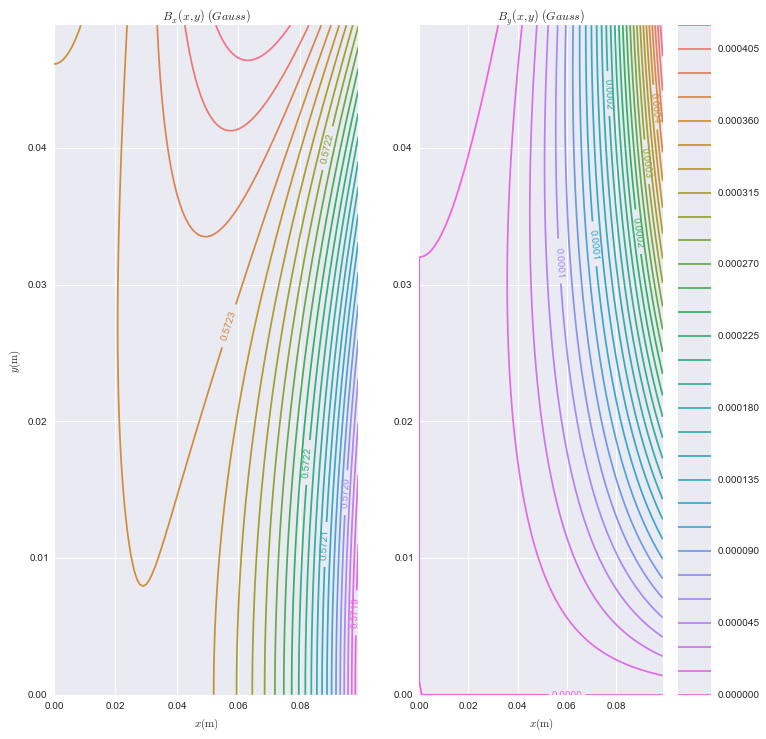

In [34]:
B_plot = plt.figure(figsize=(12,12))
# create plots of B x & y components
#     subplot(121) means one row; two columns, plot number one,
B_plot_x = B_plot.add_subplot(121)
# Create a contour plot of B_X(X,Y), with 20 contour steps
Bx = plt.contour(X, Y, B_X, 30, cmap=cmap)
plt.clabel(Bx, Bx.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
    # inline = 1 removes contour lines beneath labels
    # levels[::4] labels every 4th contour line
plt.title('$B_x(x,y)$ $(Gauss)$')
plt.xlabel('$x \mathrm{(m)}$')
plt.ylabel('$y \mathrm{(m)}$')
B_plot_y = B_plot.add_subplot(122)
By = plt.contour(X, Y, B_Y, 30, cmap=cmap)
plt.clabel(By, By.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
plt.title('$B_y(x,y)$ $(Gauss)$')
plt.xlabel('$x \mathrm{(m)}$')
plt.colorbar(orientation='vertical')
plt.show()  # display figure

## Using the matplotlib OO API

We've just seen many examples of using the ``pyplot`` API in matplotlib. Let's consider the object-oriented matplotlib API next.

Of the many circumstances that would require fine-grained control over the elements of a plot or customized use of the backend, a very clear use case for directly accessing the object-oriented matplotlib API is non-interactive, programmatic generation of plots.
Let's say you have just received an enormous amount of data from some experiments measuring magnetic fields under varying conditions and you need to generate plots for all of the interesting data sets, which happen to number in the 100s. Unless you are a very unlucky grad student (who doesn't have this book!), this is a task you will create code for, not something to be done by hand, one image at a time. You might even be running your new code on a cluster, splitting the plotting tasks up across many machine, allowing your results to be viewed that much more quickly.

We will use the example of two wires with currents traveling in opposite as a basis, but with this form of the equation, which provides for 2 different currents to be used in each wire:

\begin{align} 
\vec{\mathbf{B}} = {\mu} \Bigg( - \bigg( \frac{I_1 s_2^2 + I_2 s_1^2}{s_1^2 s_2^2} y \bigg) \hat{x}
                                + \bigg( \frac{I_1 s_2^2 x_1 + I_2 s_1^2 x_2}{s_1^2 s_2^2} \bigg) \hat{y} \Bigg)
\end{align}

\begin{align} 
= \frac{\mu}{s_1^2 s_2^2} \Big( - y \big( I_1 s_2^2 + I_2 s_1^2 \big) \hat{x}
                                + \big( I_1 s_2^2 (x - d) + I_2 s_1^2 (x + d) \big) \hat{y} \Big)
\end{align}

If you are curious, the work for this was checked using the [sympy](http://sympy.org/en/index.html) symbolic mathematics library. You can view the work [here](./sympy-factoring-bfield.ipynb).

With our equation in hand, let's convert our procedural definitions to functions:

In [35]:
def get_grid_values(xrange: tuple, yrange:tuple) -> tuple:
    return np.meshgrid(np.linspace(*xrange),
                       np.linspace(*yrange))

def get_field_components(distance: float, currents: tuple,
                         magconst: float, xrange: tuple,
                         yrange:tuple) -> tuple:
    (x, y) = get_grid_values(xrange, yrange)
    x1 = x - distance
    x2 = x + distance
    s12 = x1 ** 2 + y ** 2
    s22 = x2 ** 2 + y ** 2
    (I1, I2) = currents
    const = magconst / (s12 * s22)
    Bx = const * -y * ((I1 * s22) + (I2 * s12))
    By = const * ((I1 * s22 * x1) + (I2 * s12 * x2))
    return (Bx, By)

For any given experiment, let's create an object that will hold the necessary data for a plot:

In [36]:
class Experiment:
    def __init__(self, d: float, Is: tuple,
                 xrange, yrange, m: float=2.0e-7):
        self.distance = d
        self.magconst = m
        (self.current1, self.current2) = Is
        (self.xmin, self.xmax, _) = self.xrange = xrange
        (self.ymin, self.ymax, _) = self.yrange = yrange
        (self.x, self.y) = get_grid_values(xrange, yrange)
        self.ranges = [self.xmin, self.xmax, self.ymin, self.ymax]
        (self.Bx, self.By) = get_field_components(self.distance, Is,
                                                  self.magconst, self.xrange, self.yrange)
        self.B = self.Bx + self.By

While we're at it, let's create an object to hold some configuration values we care about:

In [37]:
class ExperimentPlotConfig:
    def __init__(self, size: tuple, title_size: int=14, label_size: int=10,
                 bgcolor: str="#aaaaaa", num_colors: int=8,
                 colorbar_adjust: float=1.0, aspect_ratio=1.0):
        self.size = size
        self.title_size = title_size
        self.label_size = label_size
        self.bgcolor = bgcolor
        self.num_colors = num_colors
        self.colorbar_adjust = colorbar_adjust
        self.aspect_ratio = aspect_ratio
    
    def fg_cmap(self, palette_name="husl"):
        colors = sns.color_palette(pallete_name, self.num_colors)
        colors.reverse()
        return LinearSegmentedColormap.from_list(pallete_name, colors)
    
    def bg_cmap(self):
        return sns.dark_palette(self.bgcolor, as_cmap=True)


Next we can create an object whose responsibility it will be to manage the matplotlib objects we care about. In essence, this will be a special case of the functions and objects in ``pyplot``, which manage matplotlib objects for general, interactive use.

In [38]:
class Plotter:
    def __init__(self, index, plot_config, experiment):
        self.cfg = plot_config
        self.data = experiment
        self.figure_manager = backend_agg.new_figure_manager(
            index, figsize=self.cfg.size)
        self.figure = self.figure_manager.canvas.figure

    def get_axes(self):
        gs = GridSpec(1, 1)
        return self.figure.add_subplot(gs[0, 0])
    
    def update_axes(self, axes):
        tmpl = ('Magnetic Field for Two Wires\n$I_1$={} A, $I_2$={} A'
                ', at d={} m')
        title = tmpl.format(self.data.current1, self.data.current2,
                            self.data.distance)
        axes.set_title(title, fontsize=self.cfg.title_size)
        axes.set_xlabel('$x \mathrm{(m)}$', fontsize=self.cfg.label_size)
        axes.set_ylabel('$y \mathrm{(m)}$', fontsize=self.cfg.label_size)
        axes.axis(self.data.ranges, aspect=self.cfg.aspect_ratio)
        return axes
    
    def make_background(self, axes):
        return axes.imshow(self.data.B, extent=self.data.ranges,
                           cmap=self.cfg.bg_cmap())
    def make_quiver(self, axes):
        return axes.quiver(self.data.x, self.data.y,
                           self.data.Bx, self.data.By,
                           self.data.B, cmap=self.cfg.fg_cmap())

    def make_colorbar(self, figure, quiver):
        return self.figure.colorbar(quiver, shrink=self.cfg.colorbar_adjust)

    def save(self, filename, **kwargs):
        axes = self.update_axes(self.get_axes())
        back = self.make_background(axes)
        quiver = self.make_quiver(axes)
        colorbar = self.make_colorbar(self.figure, quiver)
        self.figure.savefig(filename, **kwargs)
        print("Saved {}.".format(filename))

Now we're ready to run our experiment and generate plots. Let's define a couple data sets and then kick off our plotter.

In [39]:
plot_config = ExperimentPlotConfig(
    size=(12,10),
    title_size=20,
    label_size=16,
    bgcolor="#666666",
    colorbar_adjust=0.96)

experiments = [
    Experiment(d=0.04, Is=(1,1), xrange=(-0.1, 0.1, 20), yrange=(-0.1, 0.1, 20)),
    Experiment(d=2.0, Is=(10,20), xrange=(-1.2, 1.2, 70), yrange=(-1.2, 1.2, 70)),
    Experiment(d=4.0, Is=(45,15), xrange=(-5.3, 5.3, 60), yrange=(-5.3, 5.3, 60)),
    Experiment(d=2.0, Is=(1,2), xrange=(-8.0, 8.0, 50), yrange=(-8.0, 8.0, 50))]

for (index, experiment) in enumerate(experiments):
    filename = "expmt_{}.png".format(index)
    Plotter(index, plot_config, experiment).save(filename)

Saved expmt_0.png.
Saved expmt_1.png.
Saved expmt_2.png.
Saved expmt_3.png.


In [40]:
ls -1 expmt*.png

expmt_0.png
expmt_1.png
expmt_2.png
expmt_3.png


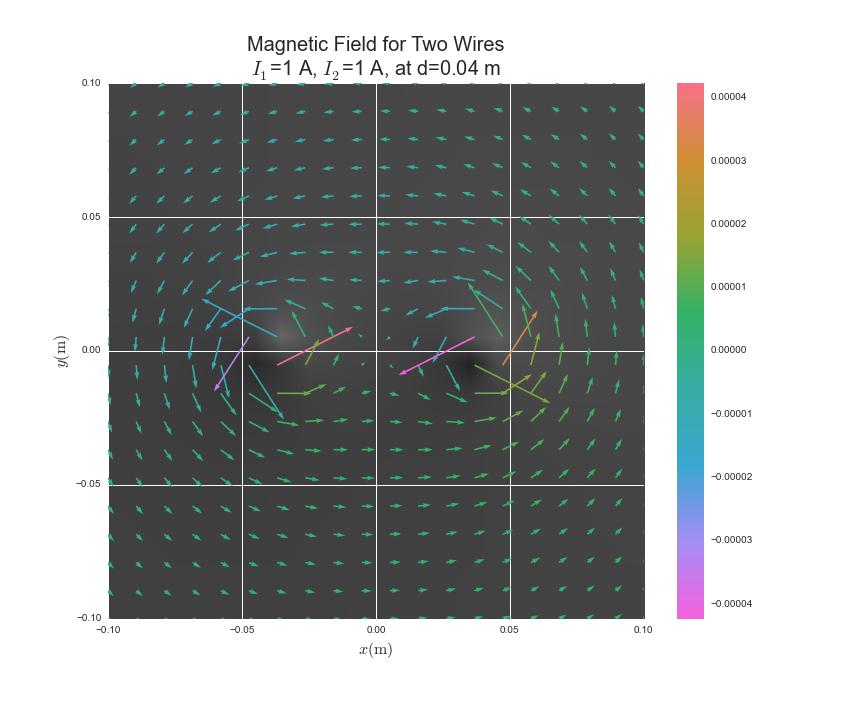

In [41]:
Image("expmt_0.png")

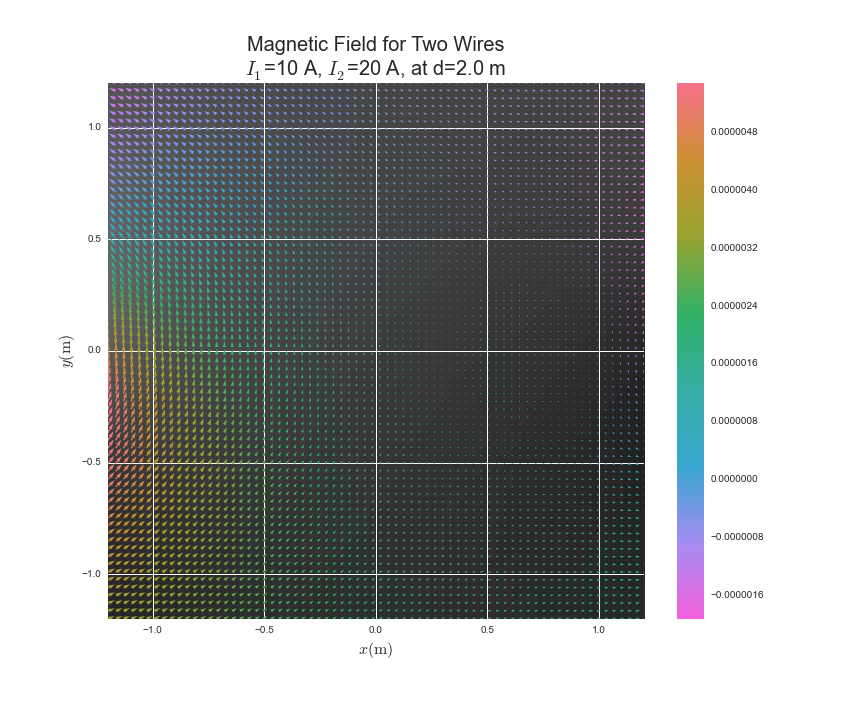

In [42]:
Image("expmt_1.png")

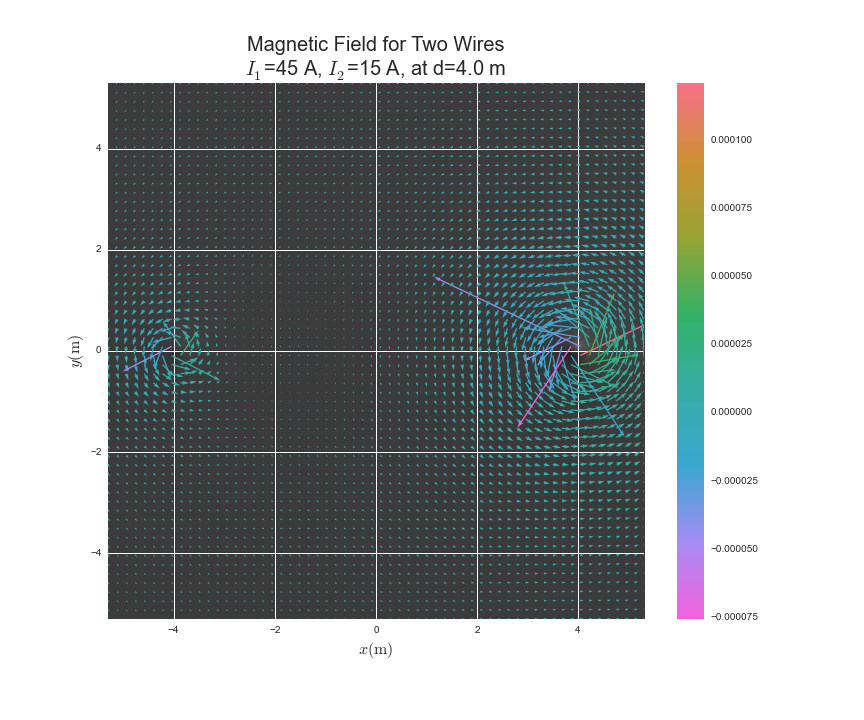

In [43]:
Image("expmt_2.png")

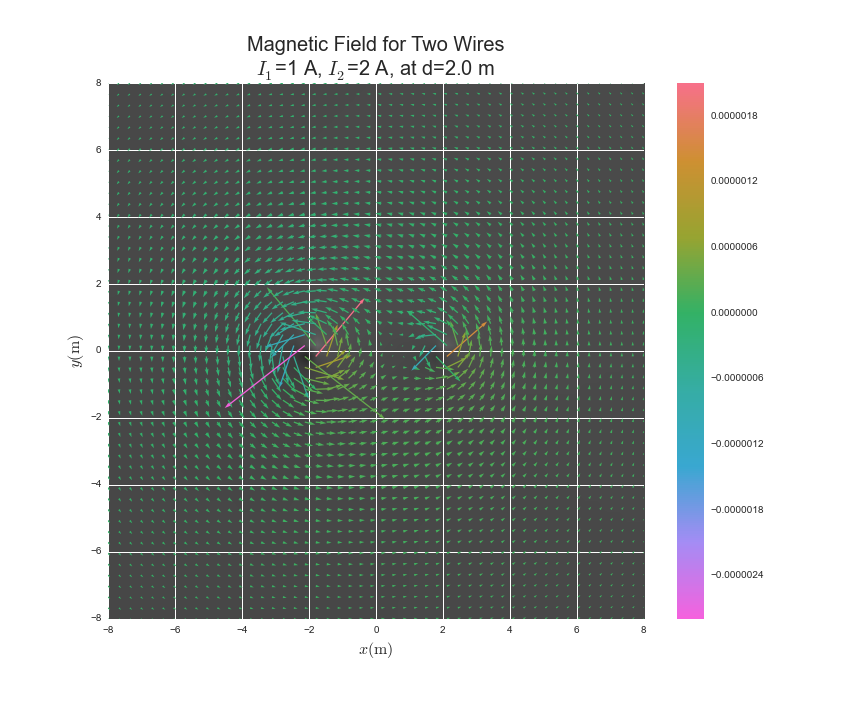

In [44]:
Image("expmt_3.png")